In [114]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import cv2

In [ ]:
# The Standard Normal Distribution is a specific instance of the Normal Distribution that has a mean of ‘0’ and a standard deviation of ‘1’.

# The visual way to understand it would be the following image (taken from here):

# https://qph.ec.quoracdn.net/main-qimg-f000c709a5729b88f564ae0b6962db61.webp
    
# The four curves are Normal distributions, but only the red one is Standard Normal (since it’s mean is zero, which means that’s where it’s centred, and its standard deviation is one, which basically tells us “how much the bell opens” to put it colloquially).

# So, if one is just a specific instance of the other, what purpose does the distinction serve?

# Suppose you have a data set of scores which are normally distributed with a mean of 86 and a standard deviation of 14. You pick a random test without looking at the score and you want to know the probability the score was below… say 72.

# What you can do is take the probability density function;


# and calculate the probability P(X<72) integrating on this function from -∞ to 72, replacing your SD and mean on the function. But it is a tedious integration at best.

# Instead, if you standardise your function then you can get it much easier.

# To do this, you subtract the mean from the value you want to examine (in this case 72) and you divide by the SD. So:

# P(X<72)=P(X<(72−86)/14)=P(X<−1)P(X<72)=P(X<(72−86)/14)=P(X<−1)

# So now you know that P(X<72) on your own Normal Distribution is equivalent to P(X<-1) on the Standard Normal Distribution.

# https://qph.ec.quoracdn.net/main-qimg-f38e39887d71f801e136ceed91de770b.webp

# You are now interested in the area of the region which is left to the -1 (which as you can see is .1587 or 15.87% probability that the score is lower than 72).

# To get this value you can integrate on the SND density function or (much preferably) you can search on the normal distribution table or Z-TABLE which resumes the results of many possible evaluations so you don’t have to integrate.

# In this case, you just look for the -1 on the left and the 00 on the top (because it is -1.00) and you can see that the probability is .1587.


In [110]:
# Define mean and covariance matrices for different distributions
mean_01 = np.array([0.0, 0.0]) #cordinate of first mean
mean_02 = np.array([7., 6.])
cov_01 = np.array([[2.0, 1.0], 
                   [1.0, 3.0]])
cov_02 = np.array([[4.0, 0.0],
                   [0.0, 2.0]])

In [111]:
#create the different datasets
# multivariate normal is same as univariate(normal bell-curve) but in multi-d
data_01 = np.random.multivariate_normal(mean_01,cov_01,250) 
data_02 = np.random.multivariate_normal(mean_02,cov_02,250)
# data_01[:,0] from start to end mean

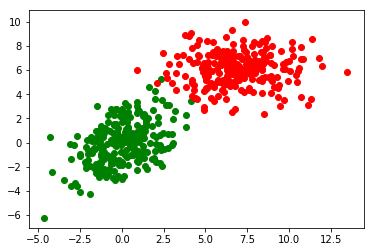

In [112]:
#plot the datasets and visualize them
plt.figure(0)
plt.scatter(data_01[:,0],data_01[:,1],color='green')
plt.scatter(data_02[:,0],data_02[:,1],color='red')
plt.show()

# Problem Statement
#### Given the bunch of clusters and which class/category each point belongs to, can you predict in which class will any given point lie?

In [81]:
data_X = np.concatenate((data_01,data_02),axis=0)
print(data_X.shape)

(500, 2)


In [83]:
data_y = np.zeros((500,1))
data_y[250:]=1
data = np.concatenate((data_X,data_y),axis=1)
print(data.shape)

(500, 3)


In [86]:
def distance(v1, v2):
    # Eucledian distance
    return np.sqrt(((v1-v2)**2).sum()) # it generalizes sqrt(sum((x2-x1)^2)+(y2-y1)^2.....n dimensions)

def knn(train, test, k=3):
    dist = []
    
    for i in range(train.shape[0]):
        # Get the vector and label
        ix = train[i, :-1] # we exclude the last one because the last one is either 0 or 1 which tell which dataset it is in, it can also be written as [1,3]
        iy = train[i, -1] # either in 0 cluster or in 1 cluster
        # Compute the distance from test point
        d = distance(test, ix)
        dist.append([d, iy])
    # Sort based on distance and get top k
    dk = sorted(dist, key=lambda x: x[0])[:k]
    # Retrieve only the labels
    labels = np.array(dk)[:, -1] # dk list k starting se ending tak, saare nodes , and on each node only return label
    
    # Get frequencies of each label
    output = np.unique(labels, return_counts=True)
    # Find max frequency and corresponding label
    index = np.argmax(output[1])
    return output[0][index]

In [87]:
x = np.array([5.0, 4.0])

print(knn(data, x, k=5))

1.0


In [88]:
#test our algo
from sklearn.datasets import load_digits

In [89]:
load_digits(return_X_y=True)[0].shape

(1797, 64)

In [90]:
data = load_digits(return_X_y=True)
X = data[0]
y = data[1]
print(X.shape,y.shape)

(1797, 64) (1797,)


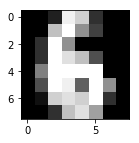

In [91]:
plt.figure(0,figsize=(2,2))
plt.imshow(X[452].reshape((8,8)),cmap='gray')
plt.show()

In [92]:
ds = np.concatenate((X,y.reshape(-1,1)),axis=1)
print(ds.shape)

(1797, 65)


In [93]:
trainset = ds[:1500]
testset = ds[1500:]

print(trainset.shape,testset.shape)

(1500, 65) (297, 65)


In [98]:
# now we have list of testing sets
import datetime




def test_on_set(trainset, testing, k=3):
    preds = []
    target = []
    # start = datetime.datetime.now()
    for ix in range(testing.shape[0]):
        out = knn(trainset, testing[ix, :-1], k=k)
        preds.append(out)
        target.append(testing[ix, -1])
    preds = np.asarray(preds)
    target = np.asarray(target)
    # stop = datetime.datetime.now()

    # print preds.shape, target.shape
    # print "Time taken: {}".format(stop - start)

    acc = float((preds == target).sum()) / len(preds) # count all true and divide by sum to get the accuracy

    print ("Accuracy: {} wiht k: {}".format(acc, k))
    return acc

In [99]:
accs = []
ks = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

for kx in ks:
    acx = test_on_set(trainset, testset, k=kx)
    accs.append(acx)

Accuracy: 0.9562289562289562 wiht k: 2
Accuracy: 0.9595959595959596 wiht k: 3
Accuracy: 0.9595959595959596 wiht k: 4
Accuracy: 0.9562289562289562 wiht k: 5
Accuracy: 0.9461279461279462 wiht k: 6
Accuracy: 0.9461279461279462 wiht k: 7
Accuracy: 0.9427609427609428 wiht k: 8
Accuracy: 0.9427609427609428 wiht k: 9
Accuracy: 0.9427609427609428 wiht k: 10
Accuracy: 0.9427609427609428 wiht k: 11
Accuracy: 0.9427609427609428 wiht k: 12
Accuracy: 0.9393939393939394 wiht k: 13
Accuracy: 0.9427609427609428 wiht k: 14
Accuracy: 0.9393939393939394 wiht k: 15
Accuracy: 0.9461279461279462 wiht k: 16
Accuracy: 0.9427609427609428 wiht k: 17
Accuracy: 0.9393939393939394 wiht k: 18


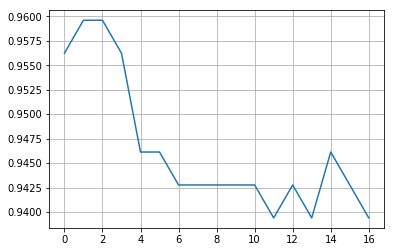

In [105]:
plt.figure(0)
plt.grid(True)
plt.plot(accs)

plt.show()

In [115]:
# http://ajcr.net/Basic-guide-to-einsum/ (Intro to ein-sum)

# Norms

#### The magnitude of a vector can be measured using a function called a norm
        - Norms map vector to non-negative values
        - The norm of a vector x measures the distance from the origin to point x